In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import timeit

import sklearn

import warnings
warnings.filterwarnings("ignore")

import sys

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/3-2-R/train.csv')
test = pd.read_csv('/content/drive/MyDrive/3-2-R/test.csv')

# (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape 이거 뜨면 \이거를 /이거로 바꾸세요 선생님들

In [ ]:
#train = train_df.copy()
#test = test_df.copy()

In [ ]:
print("train.csv. Shape: ",train.shape)
print("test.csv. Shape: ",test.shape)

train.csv. Shape:  (1216553, 13)
test.csv. Shape:  (5463, 12)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  transaction_date        1216553 non-null  object 
 11  floor                   1216553 non-null  int64  
 12  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ M

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5463 entries, 0 to 5462
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          5463 non-null   int64  
 1   apartment_id            5463 non-null   int64  
 2   city                    5463 non-null   object 
 3   dong                    5463 non-null   object 
 4   jibun                   5463 non-null   object 
 5   apt                     5463 non-null   object 
 6   addr_kr                 5463 non-null   object 
 7   exclusive_use_area      5463 non-null   float64
 8   year_of_completion      5463 non-null   int64  
 9   transaction_year_month  5463 non-null   int64  
 10  transaction_date        5463 non-null   object 
 11  floor                   5463 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 512.3+ KB


In [ ]:
train.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [ ]:
train_null = train.drop('transaction_real_price', axis = 1).isnull().sum()/len(train)*100
test_null = test.isnull().sum()/len(test)*100
pd.DataFrame({'train_null_count' : train_null, 'test_null_count' : test_null})

,train_null_count,test_null_count
transaction_id,0.0,0.0
apartment_id,0.0,0.0
city,0.0,0.0
dong,0.0,0.0
jibun,0.0,0.0
apt,0.0,0.0
addr_kr,0.0,0.0
exclusive_use_area,0.0,0.0
year_of_completion,0.0,0.0
transaction_year_month,0.0,0.0


In [ ]:
train['transaction_real_price'].describe()

count    1.216553e+06
mean     3.822769e+04
std      3.104898e+04
min      1.000000e+02
25%      1.900000e+04
50%      3.090000e+04
75%      4.700000e+04
max      8.200000e+05
Name: transaction_real_price, dtype: float64

transaction_real_price -> Skewness: 3.407169, Kurtosis: 24.839821


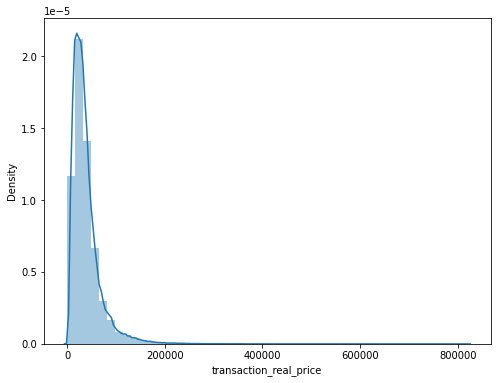

In [ ]:
f, ax = plt.subplots(figsize = (8,6))
sns.distplot(train['transaction_real_price'])
print("%s -> Skewness: %f, Kurtosis: %f" %  ('transaction_real_price',train['transaction_real_price'].skew(),
                                                     train['transaction_real_price'].kurt()))

In [ ]:
train['transaction_real_price'] = np.log1p(train['transaction_real_price'])
print("%s -> Skewness: %f, Kurtosis: %f" %  ('transaction_real_price',train['transaction_real_price'].skew(),
                                                     train['transaction_real_price'].kurt()))

transaction_real_price -> Skewness: -0.094932, Kurtosis: 0.248866


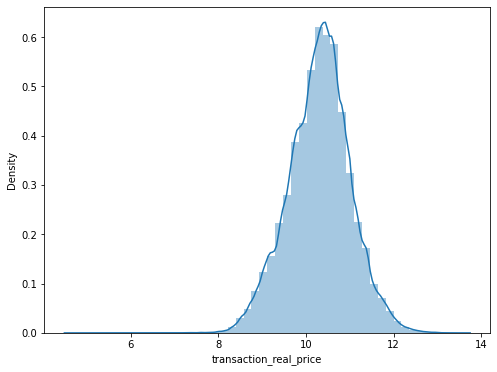

In [ ]:
f, ax = plt.subplots(figsize = (8,6))
sns.distplot(train['transaction_real_price'])

In [ ]:
len(train['apartment_id'].unique())

12533

In [ ]:
train_id = train['transaction_id']
train = train.drop('transaction_id', axis=1)
test_id = test['transaction_id']
test = test.drop('transaction_id', axis=1)

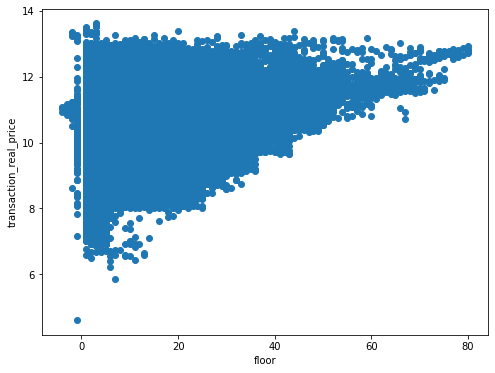

In [ ]:
f, ax = plt.subplots(figsize = (8,6))
plt.scatter(train['floor'], train['transaction_real_price'])
plt.xlabel('floor')
plt.ylabel('transaction_real_price')
plt.show()

floor -> Skewness: 1.324710, Kurtosis: 3.796603


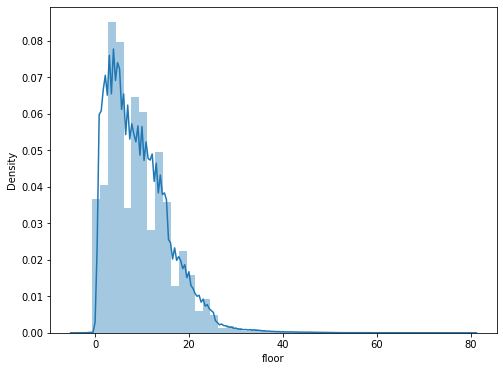

In [ ]:
f, ax = plt.subplots(figsize = (8,6))
sns.distplot(train['floor'])
print("%s -> Skewness: %f, Kurtosis: %f" %  ('floor',train['floor'].skew(),
                                                     train['floor'].kurt()))

In [ ]:
train['exclusive_use_area'].describe()

count    1.216553e+06
mean     7.816549e+01
std      2.915113e+01
min      9.260000e+00
25%      5.976000e+01
50%      8.241000e+01
75%      8.497000e+01
max      4.243200e+02
Name: exclusive_use_area, dtype: float64

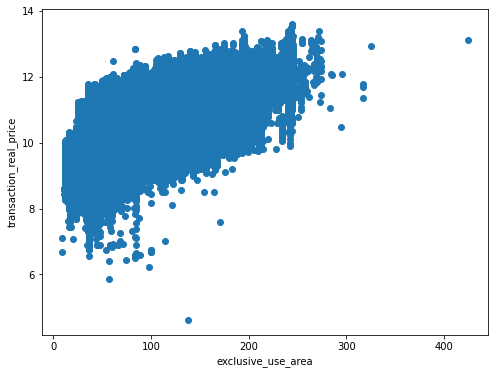

In [ ]:
f, ax = plt.subplots(figsize = (8,6))
plt.scatter(train['exclusive_use_area'], train['transaction_real_price'])
plt.xlabel('exclusive_use_area')
plt.ylabel('transaction_real_price')
plt.show()

In [ ]:
train[train['exclusive_use_area']>400]

,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
563870,12633,서울특별시,도곡동,193-1,힐데스하임빌라,도곡동 193-1 힐데스하임빌라,424.32,1998,201604,11~20,10,13.118357


In [ ]:
train[(train['exclusive_use_area']<150)&(train['transaction_real_price']<6)]

,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
312119,10853,서울특별시,신월동,128,태헌(신월프라자),신월동 128 태헌(신월프라자),56.97,1999,201005,21~31,7,5.860786
722888,6225,부산광역시,범전동,263-5,서면,범전동 263-5 서면,138.25,1974,201606,21~30,-1,4.615121


exclusive_use_area -> Skewness: 1.227509, Kurtosis: 3.100517


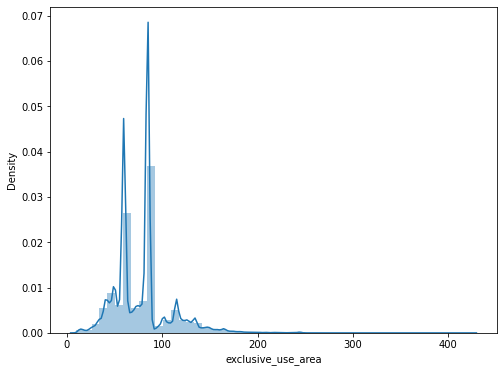

In [ ]:
f, ax = plt.subplots(figsize = (8,6))
sns.distplot(train['exclusive_use_area'])
print("%s -> Skewness: %f, Kurtosis: %f" %  ('exclusive_use_area',train['exclusive_use_area'].skew(),

                                             train['exclusive_use_area'].kurt()))

In [ ]:
train_test_data = [train, test]

for dataset in train_test_data:
    dataset['transaction_year_month'] = dataset['transaction_year_month'].astype(str)
    dataset['year'] = dataset['transaction_year_month'].str[:4].astype(int)
    dataset['month'] = dataset['transaction_year_month'].str[4:6].astype(int)
    dataset['transaction_year_month'] = dataset['transaction_year_month'].astype(int)

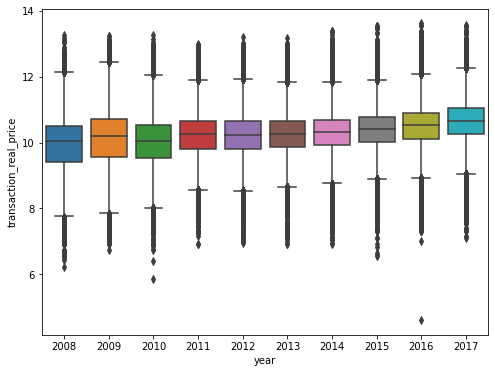

In [ ]:
f, ax = plt.subplots(figsize = (8,6))
sns.boxplot(train['year'], train['transaction_real_price'])
plt.show()

In [ ]:
train[(train['year']==2016) & (train['transaction_real_price']<6)]

,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,year,month
722888,6225,부산광역시,범전동,263-5,서면,범전동 263-5 서면,138.25,1974,201606,21~30,-1,4.615121,2016,6


In [ ]:
train[train['apt']=='서면']

,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,year,month
695725,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201105,21~31,3,8.682877,2011,5
696834,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201108,21~31,1,8.922792,2011,8
700884,6225,부산광역시,범전동,263-5,서면,범전동 263-5 서면,88.93,1974,201206,1~10,1,10.126671,2012,6
702589,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201212,21~31,5,8.699681,2012,12
702876,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201301,11~20,4,8.909370,2013,1
703979,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201304,1~10,1,8.853808,2013,4
711024,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201407,21~31,5,8.853808,2014,7
712441,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201410,21~31,3,9.082621,2014,10
713864,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201501,1~10,4,8.955577,2015,1
721684,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201604,1~10,1,9.059634,2016,4


In [ ]:
train[train['floor']==-1].sort_values('transaction_real_price')

,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,year,month
722888,6225,부산광역시,범전동,263-5,서면,범전동 263-5 서면,138.250,1974,201606,21~30,-1,4.615121,2016,6
651052,1514,부산광역시,대청동4가,75-176,근영빌라2동,대청동4가 75-176 근영빌라2동,47.170,1996,200809,21~30,-1,7.170888,2008,9
651087,1513,부산광역시,대청동4가,75-181,근영빌라1동,대청동4가 75-181 근영빌라1동,59.890,1996,200810,11~20,-1,7.824446,2008,10
651641,1514,부산광역시,대청동4가,75-176,근영빌라2동,대청동4가 75-176 근영빌라2동,47.170,1996,201101,21~31,-1,8.071219,2011,1
674249,9764,부산광역시,동삼동,213-19,조은아크로빌,동삼동 213-19 조은아크로빌,46.800,2001,201506,11~20,-1,8.160804,2015,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537384,10310,서울특별시,청담동,102-13,청담파라곤Ⅱ 2단지,청담동 102-13 청담파라곤Ⅱ 2단지,241.880,2010,201012,11~20,-1,12.577640,2010,12
1095417,11320,서울특별시,한남동,810,한남더힐,한남동 810 한남더힐,212.524,2011,201705,21~31,-1,13.081543,2017,5
1095416,11320,서울특별시,한남동,810,한남더힐,한남동 810 한남더힐,212.524,2011,201705,21~31,-1,13.102163,2017,5
23585,11320,서울특별시,한남동,810,한남더힐,한남동 810 한남더힐,240.230,2011,201612,1~10,-1,13.204866,2016,12


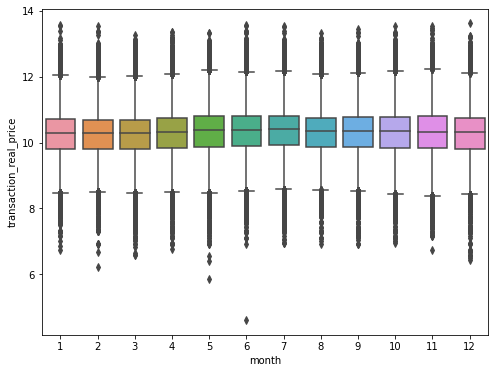

In [ ]:
f, ax = plt.subplots(figsize = (8,6))
sns.boxplot(train['month'], train['transaction_real_price'])
plt.show()

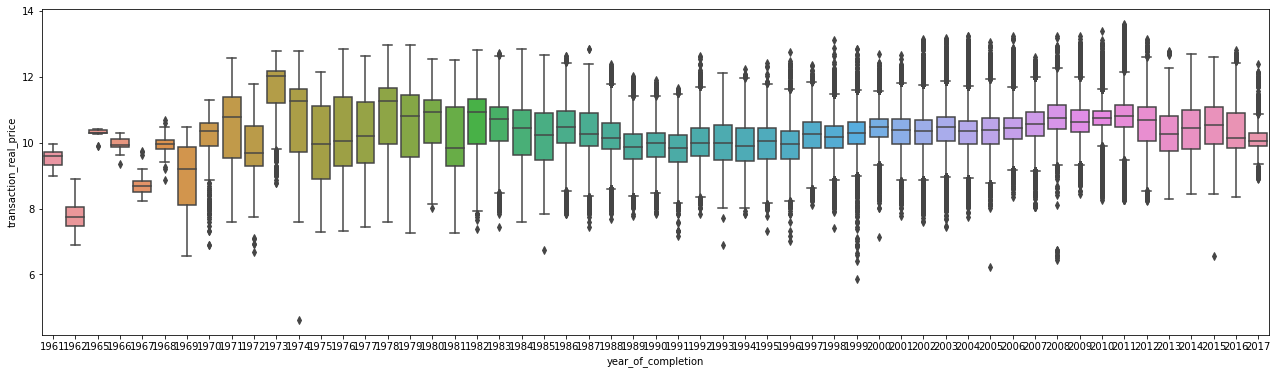

In [ ]:
f, ax = plt.subplots(figsize = (22,6))
sns.boxplot(train['year_of_completion'], train['transaction_real_price'])
plt.show()

In [ ]:
replace_name = {'서울특별시' : 0, '부산광역시' : 1 }
train = train.replace({'city' : replace_name})
test = test.replace({'city' : replace_name})

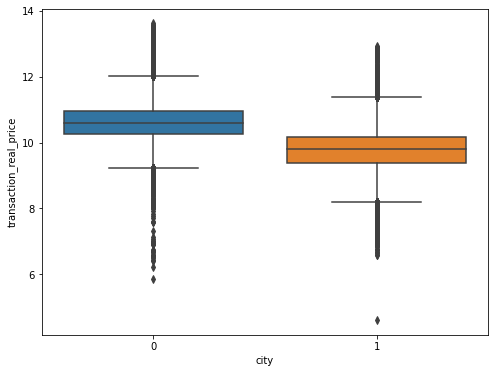

In [ ]:
f, ax = plt.subplots(figsize = (8,6))
sns.boxplot(train['city'], train['transaction_real_price'])
plt.show()

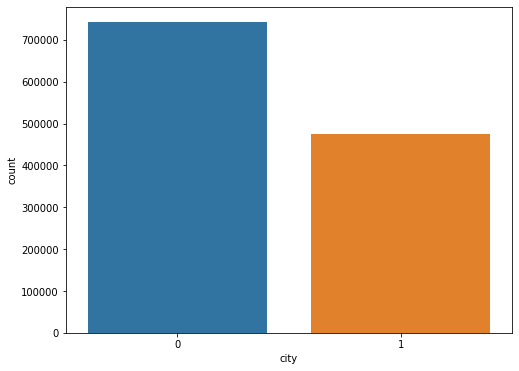

In [ ]:
f, ax = plt.subplots(figsize = (8,6))
sns.countplot(train['city'])
plt.show()

In [ ]:
train = train.drop('addr_kr', axis=1)
test = test.drop('addr_kr', axis=1)

In [ ]:
train['nearhangang']=train['dong'].isin(['성수동1가','삼성동','이촌동','공덕동','서교동','한강로3가','목동']).astype(int)
test['nearhangang']=test['dong'].isin(['성수동1가','삼성동','이촌동','공덕동','서교동','한강로3가','목동']).astype(int)

In [ ]:
len(train['dong'].unique())

473

In [ ]:
train_dong = train[['transaction_real_price','dong']].groupby('dong').mean().sort_values('transaction_real_price').reset_index()
train_dong.head()

,dong,transaction_real_price
0,신선동3가,8.543619
1,봉래동5가,8.590871
2,장안읍 명례리,8.597728
3,신창동2가,8.601466
4,신선동2가,8.622581


In [ ]:
dong_num = {}
for i in range(len(train_dong)):
    dong = train_dong['dong'].iloc[i]
    dong_num[dong] = i

dong_num

{'신선동3가': 0,
 '봉래동5가': 1,
 '장안읍 명례리': 2,
 '신창동2가': 3,
 '신선동2가': 4,
 '보수동1가': 5,
 '장충동2가': 6,
 '중앙동4가': 7,
 '부평동2가': 8,
 '수정동': 9,
 '필동1가': 10,
 '아미동2가': 11,
 '동광동5가': 12,
 '기장읍 대변리': 13,
 '초장동': 14,
 '남항동3가': 15,
 '대청동1가': 16,
 '기장읍 서부리': 17,
 '동삼동': 18,
 '반송동': 19,
 '보수동2가': 20,
 '누상동': 21,
 '봉래동3가': 22,
 '대청동4가': 23,
 '서동': 24,
 '일광면 이천리': 25,
 '덕천동': 26,
 '일광면 삼성리': 27,
 '봉래동4가': 28,
 '감만동': 29,
 '영등포동3가': 30,
 '모라동': 31,
 '행촌동': 32,
 '동대신동3가': 33,
 '학장동': 34,
 '구평동': 35,
 '좌천동': 36,
 '금곡동': 37,
 '영주동': 38,
 '장림동': 39,
 '토성동2가': 40,
 '기장읍 청강리': 41,
 '기장읍 대라리': 42,
 '영등포동1가': 43,
 '영등포동2가': 44,
 '미근동': 45,
 '감천동': 46,
 '감전동': 47,
 '전포동': 48,
 '금사동': 49,
 '기장읍 동부리': 50,
 '칠산동': 51,
 '덕포동': 52,
 '초량동': 53,
 '명장동': 54,
 '다대동': 55,
 '서대신동1가': 56,
 '오장동': 57,
 '기장읍 교리': 58,
 '대창동1가': 59,
 '영등포동4가': 60,
 '회동동': 61,
 '신평동': 62,
 '범천동': 63,
 '우암동': 64,
 '구포동': 65,
 '괴정동': 66,
 '당감동': 67,
 '안암동4가': 68,
 '토성동5가': 69,
 '개금동': 70,
 '남산동': 71,
 '당리동': 72,
 '당산동6가': 73,
 '주례동': 74,
 '통인동': 75,
 '청

In [ ]:
train = train.replace({'dong' : dong_num})
test = test.replace({'dong' : dong_num})
train.head()

,apartment_id,city,dong,jibun,apt,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,year,month,nearhangang
0,7622,0,351,6-13,신현(101동),84.82,2002,200801,21~31,2,10.532123,2008,1,0
1,5399,0,414,142,사직파크맨션,99.17,1973,200801,1~10,6,9.903538,2008,1,0
2,3578,0,414,174-1,두레엘리시안,84.74,2007,200801,1~10,6,10.558439,2008,1,0
3,10957,0,462,95,파크팰리스,146.39,2003,200801,11~20,15,11.678448,2008,1,0
4,10639,0,462,110-15,킹스매너,194.43,2004,200801,21~31,3,11.695255,2008,1,0


In [ ]:
len(train['jibun'].unique())

8961

In [ ]:
train_jibun = train[['transaction_real_price','jibun']].groupby('jibun').mean().sort_values('transaction_real_price').reset_index()
train_jibun.head()

,jibun,transaction_real_price
0,산3-148,7.225286
1,737-1,7.494417
2,741-1,7.498174
3,1181-4,7.585491
4,11-174,7.601402


In [ ]:
len(train['apt'].unique())

10440

In [ ]:
train_apt = train[['transaction_real_price','apt']].groupby('apt').mean().sort_values('transaction_real_price').reset_index()
train_apt.head()

,apt,transaction_real_price
0,좌천시민(737-1),7.494417
1,좌천시민(741-1),7.498174
2,수정(1181-4),7.585491
3,수정(1175-1),7.626830
4,수정(1186-1),7.685623


In [ ]:
train['day_diff'] = train['transaction_date'].str.extract('(~\d+)')[0].str[1:].astype(int) - train['transaction_date'].str.extract('(\d+~)')[0].str[:-1].astype(int)
test['day_diff'] = test['transaction_date'].str.extract('(~\d+)')[0].str[1:].astype(int) - test['transaction_date'].str.extract('(\d+~)')[0].str[:-1].astype(int)

In [ ]:
len(train['transaction_date'].unique())

6

In [ ]:
train_date = train[['transaction_real_price','transaction_date']].groupby('transaction_date').mean().sort_values('transaction_real_price').reset_index()
train_date.head()

,transaction_date,transaction_real_price
0,21~29,10.176453
1,21~28,10.286294
2,1~10,10.293390
3,11~20,10.306731
4,21~31,10.318796


In [ ]:
date_num = {}
for i in range(len(train_date)):
    date = train_date['transaction_date'].iloc[i]
    date_num[date] = i

date_num

{'21~29': 0, '21~28': 1, '1~10': 2, '11~20': 3, '21~31': 4, '21~30': 5}

In [ ]:
train = train.replace({'transaction_date' : date_num})
test = test.replace({'transaction_date' : date_num})
train.head()

,apartment_id,city,dong,jibun,apt,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,year,month,nearhangang,day_diff
0,7622,0,351,6-13,신현(101동),84.82,2002,200801,4,2,10.532123,2008,1,0,10
1,5399,0,414,142,사직파크맨션,99.17,1973,200801,2,6,9.903538,2008,1,0,9
2,3578,0,414,174-1,두레엘리시안,84.74,2007,200801,2,6,10.558439,2008,1,0,9
3,10957,0,462,95,파크팰리스,146.39,2003,200801,3,15,11.678448,2008,1,0,9
4,10639,0,462,110-15,킹스매너,194.43,2004,200801,4,3,11.695255,2008,1,0,10


floor -> Skewness: 0.089636, Kurtosis: -0.640885


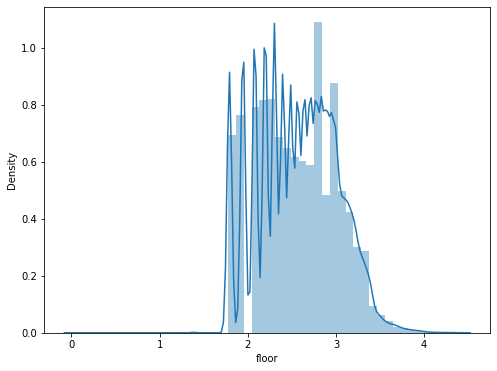

In [ ]:
train['floor'] = np.log(train['floor']+5)
test['floor'] = np.log(test['floor']+5)
f, ax = plt.subplots(figsize = (8,6))
sns.distplot(train['floor'])
print("%s -> Skewness: %f, Kurtosis: %f" %  ('floor',train['floor'].skew(),
                                                     train['floor'].kurt()))

In [ ]:
drop_columns = ['apt', 'jibun', 'transaction_year_month']

train = train.drop(drop_columns, axis=1)
test = test.drop(drop_columns, axis=1)

In [ ]:
train.head()

,apartment_id,city,dong,exclusive_use_area,year_of_completion,transaction_date,floor,transaction_real_price,year,month,nearhangang,day_diff
0,7622,0,351,84.82,2002,4,1.945910,10.532123,2008,1,0,10
1,5399,0,414,99.17,1973,2,2.397895,9.903538,2008,1,0,9
2,3578,0,414,84.74,2007,2,2.397895,10.558439,2008,1,0,9
3,10957,0,462,146.39,2003,3,2.995732,11.678448,2008,1,0,9
4,10639,0,462,194.43,2004,4,2.079442,11.695255,2008,1,0,10


In [ ]:
train['transaction_real_price']

0          10.532123
1           9.903538
2          10.558439
3          11.678448
4          11.695255
             ...    
1216548     9.998843
1216549    10.333678
1216550    10.292179
1216551    10.192456
1216552    10.268165
Name: transaction_real_price, Length: 1216553, dtype: float64

In [ ]:
train_test_data = [train, test]

for dataset in train_test_data:
    # 거래하는 기간까지의 아파트 나이를 feature 생성
    dataset['age'] = dataset['year'] - dataset['year_of_completion']
    # 샘플코드에 있는 아파트의 재건추 유무를 판단하는 feature 생성
    dataset['is_rebuild']=(dataset['age']>=30).astype(int)

In [ ]:
train_columns = []
for column in train.columns[:]:
    if train[column].skew() >= 1:
        print("%s -> Skewness: %f, Kurtosis: %f" %  (column,train[column].skew(),
                                                 train[column].kurt()))
        train_columns.append(column)
    elif train[column].kurt() >= 3:
        print("%s -> Skewness: %f, Kurtosis: %f" %  (column,train[column].skew(),
                                                 train[column].kurt()))
        train_columns.append(column)

exclusive_use_area -> Skewness: 1.227509, Kurtosis: 3.100517
nearhangang -> Skewness: 6.358349, Kurtosis: 38.428662
day_diff -> Skewness: -0.589751, Kurtosis: 4.573129
is_rebuild -> Skewness: 3.324832, Kurtosis: 9.054522


In [ ]:
for column in train_columns :
    train[column] = np.log1p(train[column])
    test[column] = np.log1p(test[column])
    print("%s -> Skewness: %f, Kurtosis: %f" %  (column,train[column].skew(),
                                                 train[column].kurt()))

exclusive_use_area -> Skewness: -0.438156, Kurtosis: 1.744119
nearhangang -> Skewness: 6.358349, Kurtosis: 38.428662
day_diff -> Skewness: -1.128137, Kurtosis: 6.788569
is_rebuild -> Skewness: 3.324832, Kurtosis: 9.054522


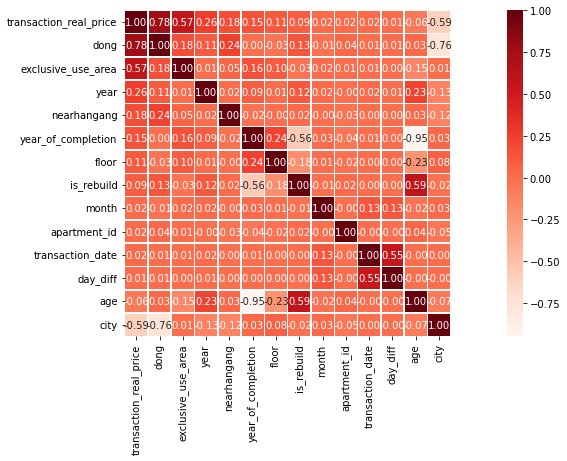

In [ ]:
k=train.shape[1] #히트맵 변수 갯수
corrmat = train.corr() #변수간의 상관관계
cols = corrmat.nlargest(k, 'transaction_real_price')['transaction_real_price'].index #price기준으로 제일 큰순서대로 20개를 뽑아냄
cm = np.corrcoef(train[cols].values.T)
f, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(data = cm, annot=True, square=True, fmt = '.2f', linewidths=.5, cmap='Reds',
            yticklabels = cols.values, xticklabels = cols.values)

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [ ]:
target = train['transaction_real_price']
del train['transaction_real_price']

In [ ]:
n_folds = 2
#모델 평가

def cv_score(models):
    kfold = KFold(n_splits=n_folds, shuffle=True ,random_state=42).get_n_splits(train.values)
    for m in models:
        cvs = np.mean(cross_val_score(m['model'], train.values, target, cv=kfold))
        rmse = np.mean(np.sqrt(-cross_val_score(m['model'], train.values, np.expm1(target),
                                                scoring = "neg_mean_squared_error", cv = kfold)))
        print("Model {} CV score : {:.4f}".format(m['name'], cvs))
        print("RMSE : {:.4f}".format(rmse))

In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state=42))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=42))
gboost = GradientBoostingRegressor(random_state=42)
forest = RandomForestRegressor(n_estimators = 100, n_jobs = -1, random_state=42)
xgboost = xgb.XGBRegressor(random_state=42)
lightgbm = lgb.LGBMRegressor(random_state=42, num_leaves = 100, min_data_in_leaf = 15, max_depth=6,
                            learning_rate = 0.1, min_child_samples = 30, feature_fraction=0.9, bagging_freq= 1,
                            bagging_fraction = 0.9, bagging_seed = 11, lambda_l1 = 0.1, verbosity = -1 )

models = [{'model': gboost, 'name':'GradientBoosting'}, {'model': xgboost, 'name':'XGBoost'},
          {'model': lightgbm, 'name':'LightGBM'}, {'model' : lasso, 'name' : 'LASSO Regression'},
          {'model' : ENet, 'name' : 'Elastic Net Regression'}, {'model' : forest, 'name' : 'RandomForset'}]

In [ ]:
start = timeit.default_timer()
cv_score(models)
stop = timeit.default_timer()
print('불러오는데 걸린 시간 : {}초'.format(stop - start))

Model GradientBoosting CV score : 0.5817
RMSE : 15799.0451
[13:06:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:07:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:07:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:07:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model XGBoost CV score : 0.5947
RMSE : 15868.0485
Model LightGBM CV score : 0.6131
RMSE : 14330.6681
Model LASSO Regression CV score : 0.6842
RMSE : 19852.5360
Model Elastic Net Regression CV score : 0.6841
RMSE : 19848.9725
Model RandomForset CV score : 0.5639
RMSE : 15146.4867
불러오는데 걸린 시간 : 1498.560126162초


In [ ]:
models = [{'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'},
         {'model':forest, 'name' : 'RandomForest'}]

def AveragingBlending(models, x, y, sub_x):
    for m in models :
        m['model'].fit(x.values, y)

    predictions = np.column_stack([m['model'].predict(sub_x.values) for m in models])
    return predictions

In [ ]:
start = timeit.default_timer()

y_test_pred = AveragingBlending(models, train, target, test)
y_test_pred = (y_test_pred[:, 0]*0.05 + y_test_pred[:, 1]*0.1 + y_test_pred[:, 2]*0.85)
predictions = y_test_pred

stop = timeit.default_timer()
print('불러오는데 걸린 시간 : {}초'.format(stop - start))

[13:25:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
불러오는데 걸린 시간 : 470.1329875370002초


In [ ]:
sub = pd.read_csv("C:/Users/a5365/OneDrive/바탕 화면/submission.csv")

FileNotFoundError: ignored

In [ ]:
sub['transaction_real_price'] = np.expm1(predictions)

In [ ]:
sub.to_csv('submission.csv', index=False)

In [ ]:
sub


In [ ]:
train_test_data = [train, test]

for dataset in train_test_data;
    dataset['transaction_year_month'] = dataset['transaction_year_month'].astype(str)
    dataset['year'] = dataset['transaction_year_month'].str[:4].astype(int)
    dataset['month'] = dataset['transaction_year_month'].str[4:6].astype(int)
    dataset['transaction_year_month'] = dataset['transaction_year_month'].astype(int)